<p style="margin-block-start: 1em; margin-block-end: 1em; margin-inline-start: 0px; margin-inline-end: 0px; vertical-align: middle; text-align: center;  border: 3px solid green; ">
    <a target="_top" href="https://colab.research.google.com/github/maksteel/GLabs_Data_Science_Learn/blob/master/Email Classification - Spam or Ham using logistic regression/notebook/Email Classification - Spam or Ham using logistic regression-MK.ipynb">
      <img style="height: 4rem; padding-right: 0.5rem; vertical-align: middle;" src="https://colab.research.google.com/img/colab_favicon.ico">
      <strong style="font-size: 2em; vertical-align: middle;">View in Colab</strong>
    </a>
  </p>

# Resources used in the session:

- [Wiki Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix)
- [XKCD Machine Learning](https://xkcd.com/1838/)
- [Tuning Hyper Parameters](https://scikit-learn.org/stable/modules/grid_search.html#exhaustive-grid-search)
- [Model Specific Cross Validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV)
- [Increase accuracy of Logistic regression](https://stackoverflow.com/questions/38077190/how-to-increase-the-model-accuracy-of-logistic-regression-in-scikit-python)
- [Order of feature/model selection and parameter tuning](https://stats.stackexchange.com/questions/264533/how-should-feature-selection-and-hyperparameter-optimization-be-ordered-in-the-m)
- Scikit-Learn Pipeline [[1]](https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html) [[2]](https://scikit-learn.org/stable/auto_examples/compose/plot_compare_reduction.html)

#  Classifying Email as Spam or Non-Spam

[Source: UCI ML Repo: Spambase Data Set](https://archive.ics.uci.edu/ml/datasets/spambase) 

Our collection of spam e-mails came from our postmaster and individuals who had filed spam. Our collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter. 

-  Number of Instances: 4601 (1813 Spam = 39.4%)
-  Number of Attributes: 58 (57 continuous, 1 nominal class label)

-  Attribute Information:

    -  The last column of 'spambase.data' denotes whether the e-mail was 
    considered spam (1) or not (0)
    
    - 48 attributes are continuous real [0,100] numbers of type `word freq WORD` i.e. percentage of words in the e-mail that match WORD

    - 6 attributes are continuous real [0,100] numbers of type `char freq CHAR` i.e. percentage of characters in the e-mail that match CHAR

    - 1 attribute is continuous real [1,...] numbers of type `capital run length average` i.e. average length of uninterrupted sequences of capital letters

    - 1 attribute is continuous integer \[1,...\] numbers of type
`capital run length longest` i.e. length of longest uninterrupted sequence of capital letters

    - 1 attribute is continuous integer \[1,...\] numbers of type `capital run length total` i.e.
sum of length of uninterrupted sequences of capital letters in the email

    - 1 attribute is nominal {0,1} class  of type spam i.e  denotes whether the e-mail was considered spam (1) or not (0),  

- Missing Attribute Values: None

- Class Distribution: 
|   |   |
|---|---|
| Spam | 1813  (39.4%) |
| Non-Spam  | 2788  (60.6%) |



In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")


---
## Part A: Base Model

----
### Task 1: Load the data  stored in `path` using `.read_csv()` api.

In [2]:
df = pd.read_csv('../data/email_data.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


#### Insight: With no headers we won't know which `WORDs` or `CHARs` are used in the dataset. However, this does not stop us from using an ML algorithm


----
### Task 2: Get an overview of your data by using info() and describe() functions of pandas.



In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4601 non-null   float64
 1   1       4601 non-null   float64
 2   2       4601 non-null   float64
 3   3       4601 non-null   float64
 4   4       4601 non-null   float64
 5   5       4601 non-null   float64
 6   6       4601 non-null   float64
 7   7       4601 non-null   float64
 8   8       4601 non-null   float64
 9   9       4601 non-null   float64
 10  10      4601 non-null   float64
 11  11      4601 non-null   float64
 12  12      4601 non-null   float64
 13  13      4601 non-null   float64
 14  14      4601 non-null   float64
 15  15      4601 non-null   float64
 16  16      4601 non-null   float64
 17  17      4601 non-null   float64
 18  18      4601 non-null   float64
 19  19      4601 non-null   float64
 20  20      4601 non-null   float64
 21  21      4601 non-null   float64
 22  

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


#### Insight: Data is clean and all features are numeric. Also many word frequencies appear to be zero (looking at their quartile values), indicating these words maybe the ones that help decide spam from not-spam.

---
### Task 3.1: Split the data into train and test set and fit the base logistic regression model on train set.

In [4]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.3, random_state = 42)
lr = LogisticRegression(random_state=101)
lr.fit(X_train, y_train)

LogisticRegression(random_state=101)

### Task 3.2 Compare predicted values and observed values

In [5]:
# Compare observed value and Predicted value
print("Prediction for 10 observation:    ",lr.predict(X_test[0:10]))
print("Actual values for 10 observation: ",y_test[0:10].values)

Prediction for 10 observation:     [0 0 0 0 0 1 0 0 0 0]
Actual values for 10 observation:  [0 0 0 1 0 1 0 0 0 0]


#### Insight: Fantastic, 9/10 are correct predictions

### Task 3.3 Find out the accuracy, print out the Classification report and Confusion Matrix.

In [6]:
print("Accuracy on test data:", lr.score(X_test,y_test))

Accuracy on test data: 0.9210716871832005


Confusion Matrix: 
 [[750  54]
 [ 55 522]]


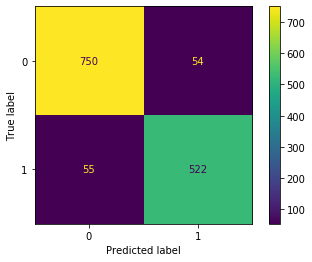

In [7]:
y_pred = lr.predict(X_test)
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))

## see the plot
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr, X_test, y_test)

In [8]:
print("Classification Report: \n",classification_report(y_test,y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       804
           1       0.91      0.90      0.91       577

    accuracy                           0.92      1381
   macro avg       0.92      0.92      0.92      1381
weighted avg       0.92      0.92      0.92      1381



#### Insight: Base model is jus the start, but this time its a pretty good start, lets see if we can improve on it.

---
## Part B: Feature Selection

---
###  Task 4: Copy dataset df into df1 variable and apply correlation on df1

In [9]:
df1 = df.copy()

---
### Task 5.1: As we have learned  one of the assumptions of Logistic Regression model is that the independent features should not be correlated to each other (i.e no multicolinearity).

So we have to find the features that have a correlation higher that 0.75 and remove the same so that the assumption for logistic regression model is satisfied. 

In [10]:
# Remove correlated features 
## Adapted from 
## https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/
corr_matrix = df1.drop(57, axis=1).corr().abs()
upper_mask = np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool)
upper = corr_matrix.where(upper_mask)
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
print("Columns to be dropped: ")
print(to_drop)
df1.drop(to_drop,axis=1,inplace=True)

Columns to be dropped: 
[33, 39]


### Task 5.2: Split the  new subset of the  data acquired by feature selection into train and test set and fit the logistic regression model on train set.

In [11]:
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 42)
lr = LogisticRegression(random_state=101)
lr.fit(X_train,y_train)

LogisticRegression(random_state=101)

### Task 5.3 Find out the accuracy, print out the Classification report and Confusion Matrix.

In [12]:
print("Accuracy on test data:", lr.score(X_test,y_test))
y_pred = lr.predict(X_test)
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("Classification Report: \n",classification_report(y_test,y_pred))

Accuracy on test data: 0.9210716871832005
Confusion Matrix: 
 [[746  58]
 [ 51 526]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       804
           1       0.90      0.91      0.91       577

    accuracy                           0.92      1381
   macro avg       0.92      0.92      0.92      1381
weighted avg       0.92      0.92      0.92      1381



#### Insight: After removing highly correlated features, there is not much change in the score. 

---
### Task 6.1: Lets apply a feature selection technique (Chi Squared test) to see whether we can increase our accuracy score. 

Find the optimum number of features using Chi Square and fit the logistic model on train data.

In [13]:
# let us try selecting different number of features using chi2 test
nof_list = [20,25,30,35,40,50,55]
high_score = 0
nof = 0
best_chi_model = None
best_chi_X_train = None
best_chi_X_test = None

for n in nof_list:
    test = SelectKBest(score_func=chi2 , k= n )
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 42)
    X_train = test.fit_transform(X_train,y_train)
    X_test = test.transform(X_test)
    
    chi_model = LogisticRegression(random_state=101)
    chi_model.fit(X_train,y_train)
    print("For no of features=",n,", score=", chi_model.score(X_test,y_test))
    if chi_model.score(X_test,y_test)>high_score:
        high_score = chi_model.score(X_test,y_test)
        nof = n 
        best_chi_model = chi_model
        best_chi_X_train = X_train
        best_chi_X_test = X_test
print("High Score is:",high_score, "with features=",nof)

For no of features= 20 , score= 0.9015206372194062
For no of features= 25 , score= 0.9102099927588704
For no of features= 30 , score= 0.9116582186821144
For no of features= 35 , score= 0.9225199131064447
For no of features= 40 , score= 0.9210716871832005
For no of features= 50 , score= 0.9232440260680667
For no of features= 55 , score= 0.9210716871832005
High Score is: 0.9232440260680667 with features= 50


### Task 6.2 Print out the Confusion Matrix.

In [14]:
y_pred = best_chi_model.predict(best_chi_X_test)
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))

Confusion Matrix: 
 [[755  49]
 [ 57 520]]


In [15]:
from IPython.display import Markdown as md
md("#### Insight: Using chi squared test there is no or very little change in \
the score and the optimum features that we got is {}.".format(nof))

#### Insight: Using chi squared test there is no or very little change in the score and the optimum features that we got is 50.

---
### Task 7.1 Now lets see if we can increase our score using another feature selection technique called Anova.

Find the optimum number of features using Anova and fit the logistic model on train data.

In [16]:
# let us try selecting different number of features using anova test
nof_list = [20,25,30,35,40,50,55]
high_score = 0
nof = 0
best_anova_model = None
best_anova_X_train = None
best_anova_X_test = None

for n in nof_list:
    test = SelectKBest(score_func=f_classif , k= n )
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
    X_train = test.fit_transform(X_train,y_train)
    X_test = test.transform(X_test)
    anova_model = LogisticRegression()
    anova_model.fit(X_train,y_train)
    print("For no of features=",n,", score=", anova_model.score(X_test,y_test))

    if anova_model.score(X_test,y_test)>high_score:
        high_score = anova_model.score(X_test,y_test)
        nof = n 
        best_anova_model = anova_model
        best_anova_X_train = X_train
        best_anova_X_test = X_test
print("High Score is:",high_score, "with features=",nof)

For no of features= 20 , score= 0.8855901520637219
For no of features= 25 , score= 0.9015206372194062
For no of features= 30 , score= 0.9174511223750905
For no of features= 35 , score= 0.9181752353367125
For no of features= 40 , score= 0.9160028964518465
For no of features= 50 , score= 0.9246922519913107
For no of features= 55 , score= 0.9210716871832005
High Score is: 0.9246922519913107 with features= 50


### Task 7.2 Print out the Confusion Matrix.

In [17]:
y_pred = best_anova_model.predict(best_anova_X_test)
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))

Confusion Matrix: 
 [[754  50]
 [ 54 523]]


#### Insight: Number of selected features still seem to remain same.

---
### Task 8.1: Let us apply PCA as our last feature selection method

In [18]:
# Apply PCA and fit the logistic model on train data use df dataset
nof_list = [20,25,30,35,40,50,55]
high_score = 0
nof = 0
best_pca_lr_model = None
best_pca_lr_X_train = None
best_pca_lr_X_test = None

for n in nof_list:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 42)
    pca = PCA(n_components=n)
    pca.fit(X_train)
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)
    pca_lr_model = LogisticRegression(random_state=101)
    pca_lr_model.fit(X_train, y_train)
    print("For no of features=",n,", score=", pca_lr_model.score(X_test,y_test))
    
    if pca_lr_model.score(X_test,y_test)>high_score:
        high_score = pca_lr_model.score(X_test,y_test)
        nof = n
        best_pca_lr_model = pca_lr_model
        best_pca_lr_X_train = X_train
        best_pca_lr_X_test = X_test
print("High Score is:",high_score, "with features=",nof)

For no of features= 20 , score= 0.9022447501810282
For no of features= 25 , score= 0.9044170890658942
For no of features= 30 , score= 0.9058653149891384
For no of features= 35 , score= 0.9167270094134685
For no of features= 40 , score= 0.9196234612599565
For no of features= 50 , score= 0.9167270094134685
For no of features= 55 , score= 0.9174511223750905
High Score is: 0.9196234612599565 with features= 40


### Task 8.2 Print out the Confusion Matrix.

In [19]:
y_pred = best_pca_lr_model.predict(best_pca_lr_X_test)
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))

Confusion Matrix: 
 [[759  45]
 [ 66 511]]


#### Insight: There is significant reduction in number of features selected but the score is not the best.

---
## Part C: Hyper-parameter optimisation

---
### Task 9: Let us try to optimise the hyper-parameters of high scoring model with featuers selected with PCA

In [20]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'penalty': ['l2', 'l1', 'elasticnet'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
search = GridSearchCV(best_pca_lr_model, param_grid, cv=5)
search.fit(best_pca_lr_X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=101),
             param_grid={'penalty': ['l2', 'l1', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [21]:
search.best_params_

{'penalty': 'l1', 'solver': 'liblinear'}

In [22]:
search.best_score_

0.9170807453416149

#### Insight: The score did not improve much.

---
### Task 10: Does the order matter? 
**Method A:**  
Try different feature selection techniques, choose the model with best score and finally optimise its hyper-parameters  

**Method B:**  
Perform feature selection and hyper-parameters tuning for each model, then select the best model

So far, we have been trying Method A, let us try Method B, first with Chi-square and Anova, then with all Chi-square, Anova and PCA put together


In [23]:
# Using Scikit-learn Pipeline method for Chi2 and Anova
nof_list = [20,25,30,35,40,50,55]
scoring_func_list = [f_classif, chi2]
penalty_list = ['l2', 'l1', 'elasticnet']
solver_list = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

pipe = Pipeline([
    ('select', SelectKBest()),
    ('model', LogisticRegression())
])

param_grid = {
    'select__k': nof_list,
    'select__score_func': scoring_func_list,
    'model__penalty': penalty_list,
    'model__solver': solver_list}

search = GridSearchCV(pipe, param_grid, cv=5)
best_model = search.fit(X, y)

best_model.best_params_,best_model.best_estimator_,best_model.best_score_

({'model__penalty': 'l1',
  'model__solver': 'liblinear',
  'select__k': 55,
  'select__score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>},
 Pipeline(steps=[('select', SelectKBest(k=55)),
                 ('model',
                  LogisticRegression(penalty='l1', solver='liblinear'))]),
 0.9134954916678467)

In [24]:
# Using Scikit-learn Pipeline method for Chi2, Anova and PCA
nof_list = [20,25,30,35,40,50,55]
scoring_func_list = [f_classif, chi2]
penalty_list = ['l2', 'l1', 'elasticnet']
solver_list = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

pipe = Pipeline([
    # select stage is populated by the param_grid
    ('select', 'passthrough'),
    ('model', LogisticRegression())
])

param_grid = [
    {
        'select':[SelectKBest()],
        'select__k': nof_list,
        'select__score_func': scoring_func_list,
        'model__penalty': penalty_list,
        'model__solver': solver_list
    },
    {
        'select':[PCA()],
        'select__n_components': nof_list,
        'model__penalty': penalty_list,
        'model__solver': solver_list
    }
]
search = GridSearchCV(pipe, param_grid, cv=5)
best_model = search.fit(X, y)

best_model.best_params_,best_model.best_estimator_,best_model.best_score_

({'model__penalty': 'l1',
  'model__solver': 'liblinear',
  'select': SelectKBest(k=55, score_func=<function chi2 at 0x7fa9904f97b8>),
  'select__k': 55,
  'select__score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>},
 Pipeline(steps=[('select',
                  SelectKBest(k=55,
                              score_func=<function chi2 at 0x7fa9904f97b8>)),
                 ('model',
                  LogisticRegression(penalty='l1', solver='liblinear'))]),
 0.9139300382382098)